In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [2]:
#creating path to source file
path = r'C:\Users\nikman\Desktop\CareerFoundry Project\Achievement 4\02-2024 Instacart Basket Analysis'

In [3]:
# importing ords_prods_new_variable
ords_prods_merge = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data','ords_prods_new_variable.pkl'))

In [4]:
#checking imported dataframe
ords_prods_merge.head()

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  ...  \
0                     NaN         196                  1          0  ...   
1                    15.0         196                  1          1  ...   
2                    21.0         196                  1          1  ...   
3                    29.0         196                  1          1  ...   
4                    28.0         196                  1          1  ...   

  Unnamed: 0  product_name aisle_id  department_id  prices  _merge  \
0        195          Soda       77              7     9.0    both   
1        195          Soda       77              7     9.0    both   
2        195          Soda       77              7     9.0    both   
3        195          Soda       77              7     9.0    both   
4        195          Soda       77              7     9.0    both   

        price_range_loc     busiest_day      Busiest_days  \
0  Medium-range product  Regularly Busy               nan   
1  Medium-range product  Regularly Busy  two slowest days   
2  Medium-range product  Regularly Busy  two slowest days   
3  Medium-range product      Least Busy  two slowest days   
4  Medium-range product      Least Busy  two slowest days   

  busiest_period_of_day  
0        Average orders  
1        Average orders  
2           Most orders  
3        Average orders  
4           Most orders  

[5 rows x 21 columns]

In [5]:
# using group by and transform functions  to determine maximum order number for each user
ords_prods_merge['max_order_no'] = ords_prods_merge.groupby(['user_id'])['order_number'].transform(np.max)

C:\Users\nikman\AppData\Local\Temp\ipykernel_11880\2097211513.py:2: FutureWarning: The provided callable <function amax at 0x000001D5B53A9DA0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ords_prods_merge['max_order_no'] = ords_prods_merge.groupby(['user_id'])['order_number'].transform(np.max)


In [6]:
#check outfut
ords_prods_merge.head(15)

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0    2539329        1    prior             1          2                  8   
1    2398795        1    prior             2          3                  7   
2     473747        1    prior             3          3                 12   
3    2254736        1    prior             4          4                  7   
4     431534        1    prior             5          4                 15   
5    3367565        1    prior             6          2                  7   
6     550135        1    prior             7          1                  9   
7    3108588        1    prior             8          1                 14   
8    2295261        1    prior             9          1                 16   
9    2550362        1    prior            10          4                  8   
10   2968173       15    prior            15          1                  9   
11   1870022       15    prior            17          2                 16   
12   1911383       15    prior            18          2                 11   
13   2715276       15    prior            21          1                  9   
14    487368       15    prior            22          1                 10   

    days_since_prior_order  product_id  add_to_cart_order  reordered  ...  \
0                      NaN         196                  1          0  ...   
1                     15.0         196                  1          1  ...   
2                     21.0         196                  1          1  ...   
3                     29.0         196                  1          1  ...   
4                     28.0         196                  1          1  ...   
5                     19.0         196                  1          1  ...   
6                     20.0         196                  1          1  ...   
7                     14.0         196                  2          1  ...   
8                      0.0         196                  4          1  ...   
9                     30.0         196                  1          1  ...   
10                     7.0         196                  2          0  ...   
11                     8.0         196                  6          1  ...   
12                     7.0         196                  1          1  ...   
13                     7.0         196                  1          1  ...   
14                    14.0         196                  1          1  ...   

   product_name  aisle_id department_id  prices  _merge       price_range_loc  \
0          Soda        77             7     9.0    both  Medium-range product   
1          Soda        77             7     9.0    both  Medium-range product   
2          Soda        77             7     9.0    both  Medium-range product   
3          Soda        77             7     9.0    both  Medium-range product   
4          Soda        77             7     9.0    both  Medium-range product   
5          Soda        77             7     9.0    both  Medium-range product   
6          Soda        77             7     9.0    both  Medium-range product   
7          Soda        77             7     9.0    both  Medium-range product   
8          Soda        77             7     9.0    both  Medium-range product   
9          Soda        77             7     9.0    both  Medium-range product   
10         Soda        77             7     9.0    both  Medium-range product   
11         Soda        77             7     9.0    both  Medium-range product   
12         Soda        77             7     9.0    both  Medium-range product   
13         Soda        77             7     9.0    both  Medium-range product   
14         Soda        77             7     9.0    both  Medium-range product   

       busiest_day      Busiest_days busiest_period_of_day max_order_no  
0   Regularly Busy               nan        Average orders           10  
1   Regularly Busy  two slowest days        Average orders           10  
2  

In [7]:
#creating loyalty flag
ords_prods_merge.loc[ords_prods_merge['max_order_no'] > 40, 'Loyalty_flag'] = 'Loyal customer'

In [8]:
#creating loyalty flag
ords_prods_merge.loc[(ords_prods_merge['max_order_no'] >10) & (ords_prods_merge['max_order_no'] <= 40), 'Loyalty_flag'] = 'Regular customer'

In [9]:
#creating loyalty flag
ords_prods_merge.loc[ords_prods_merge['max_order_no'] <= 10, 'Loyalty_flag'] = 'New customer'

In [ ]:
import matplotlib.pyplot as plt

# Get value counts for 'Loyalty_flag' column
loyalty_counts = ords_prods_merge['Loyalty_flag'].value_counts()

# Plot pie chart
loyalty_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, labeldistance=0.75)

# Add title
plt.title('Distribution of Loyalty Flag')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

#export
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'loyalty_pie.png'))

# Show plot
plt.show()


In [ ]:
#line chart: no of orders on y and day of week on x axis


In [ ]:
ords_prods_merge.columns

In [10]:
#create a subset
#creating a sample data 80/20
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.8

In [11]:
#create two samples
big_sample = ords_prods_merge[dev]
small_sample = ords_prods_merge[~dev]

In [12]:
#checking output of samples by checkint the no of rows
len(ords_prods_merge) == len(small_sample) + len(big_sample)

True

In [13]:
df_line = small_sample[['order_number', 'order_dow','Loyalty_flag']]

In [ ]:
df_line.columns

In [ ]:

# Mapping days of the week to numeric numbers
day_mapping = {
    0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday'
}

# Apply the mapping to the 'order_dow' column
df_line['day_of_week'] = df_line['order_dow'].map(day_mapping)

# Specify the order of days of the week
order_of_days = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Creating a countplot with seaborn
sns.set(style="white")  # Set style for seaborn plot
plt.figure(figsize=(10, 6))  # Set figure size
new_line = sns.countplot(data=df_line, x='day_of_week', hue='Loyalty_flag', order=order_of_days)

# Adding title to the plot
plt.title('Number of Orders by Day of the Week and Loyalty Flag')

# Adjusting x-axis labels
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adding y-axis label
plt.ylabel('Number of Orders')

# Displaying legend
plt.legend(title='Loyalty Flag', loc='upper right')




In [ ]:
#Export
new_line.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations','grp_bar-loyalty_behav1'))

In [ ]:
df_line1 = small_sample[['order_number', 'order_hour_of_day','Loyalty_flag']]

In [ ]:
# Creating a countplot with seaborn
sns.set(style="white")  # Set style for seaborn plot
plt.figure(figsize=(10, 6))  # Set figure size
hour_loyalty = sns.countplot(data=df_line1, x='order_hour_of_day', hue='Loyalty_flag')

# Adding title to the plot
plt.title('Number of Orders by Hour of Day and Loyalty Flag')

# Adjusting x-axis labels
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adding y-axis label
plt.ylabel('Number of Orders')

# Displaying legend
plt.legend(title='Loyalty Flag', loc='upper right')



In [ ]:
#Export
hour_loyalty.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations','hour_loyalty2.png'))

In [14]:
#import
#importing lated merged dataframe
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'ords_prods_customer_final.pkl'))

In [15]:
df.columns

Index(['key_column', 'user_id', 'order_number', 'order_days_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'Busiest_days', 'busiest_period_of_day', 'max_order_no', 'Loyalty_flag',
       'avg_price_orders', 'spending_flag', 'median_days_since_prior_order',
       'frequency_flag', 'First Name', 'Last_Name', 'STATE', 'Age',
       'Number_of_dependants', 'Family_Status', 'income', '_merge'],
      dtype='object')

In [16]:
#Create new column called Regions
df.loc[df['STATE'].isin(['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York',
'Pennsylvania','New Jersey']), 'Region'] = 'Northeast'

In [17]:
#Create new column called Regions
df.loc[df['STATE'].isin(['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']), 'Region'] = 'Midwest'

In [18]:
#Create new column called Regions
df.loc[df['STATE'].isin(['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']), 'Region'] = 'South'

In [19]:
#Create new column called Regions
# Create new column called Regions
df.loc[df['STATE'].isin(['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']), 'Region'] = 'West'


In [ ]:
df.columns

In [20]:
#check frequency of Region column
df['Region'].value_counts(dropna = False)

Region
South        652456
West         498836
Midwest      461008
Northeast    342867
Name: count, dtype: int64

In [ ]:
#Creat a mean, min, max of orders by group by function to evaluate customer behaviour
df_cust_behav = df.groupby('Region').agg({'order_number':['mean', 'min', 'max']})

In [ ]:
df_cust_behav

In [21]:
#create a subset
#creating a sample data 80/20
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.8

In [22]:
#create two samples
big_sample = df[dev]
small_sample = df[~dev]

In [ ]:
df_line3= small_sample[['order_number','order_hour_of_day','order_days_of_the_week', 'Region','Loyalty_flag']]

In [ ]:
df_line3.columns

In [ ]:
df_line3['day_of_week'] = df_line3['order_days_of_the_week'].map(day_mapping)
# Specify the order of days of the week
#order_of_days = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']


# Creating a countplot with seaborn
sns.set(style="white")  # Set style for seaborn plot
plt.figure(figsize=(10, 6))  # Set figure size
region_beh_hour = sns.countplot(data=df_line3, x='order_hour_of_day', hue='Region', palette='Set2')

# Adding title to the plot
plt.title('Number of Orders by Hour of Day and Region')


# Adding y-axis label
plt.ylabel('Number of Orders')

# Displaying legend
plt.legend(title='Regions', loc='upper right')



In [ ]:
#Export
region_beh_hour.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations','region_beh_hour.png'))

## Age

In [23]:
df.loc[df['Age'] < 30 , 'Age_Criteria'] = 'Young Adult'

In [24]:
df.loc[(df['Age'] >= 30) & (df['Age'] <= 50), 'Age_Criteria'] = 'Middle Age Adult'

In [25]:
df.loc[df['Age'] > 50 , 'Age_Criteria'] = 'Senior Adult'

In [26]:
df['Age_Criteria'].value_counts(dropna=False)

Age_Criteria
Senior Adult        946136
Middle Age Adult    644048
Young Adult         364983
Name: count, dtype: int64

## Income

In [27]:
df.loc[df['income'] < 90000 , 'Income_Criteria'] = 'Low Income'

In [28]:
df.loc[df['income'] > 90000 , 'Income_Criteria'] = 'High Income'

In [29]:
df['Income_Criteria'].value_counts()

Income_Criteria
High Income    1040429
Low Income      914738
Name: count, dtype: int64

## Department

In [30]:
df.loc[df['department_id'] == 18 , 'Baby/Pet Purchases'] = 'Parent of Baby'

In [31]:
df.loc[df['department_id'] == 8 , 'Baby/Pet Purchases'] = 'Owner of Pet'

## Dependants

In [32]:
df.loc[df['Number_of_dependants'] > 0 , 'Dependant_Status'] = 'Depandants'

In [33]:
df.loc[df['Number_of_dependants'] == 0 , 'Dependant_Status'] = 'No Dependants'

In [34]:
df.columns

Index(['key_column', 'user_id', 'order_number', 'order_days_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'Busiest_days', 'busiest_period_of_day', 'max_order_no', 'Loyalty_flag',
       'avg_price_orders', 'spending_flag', 'median_days_since_prior_order',
       'frequency_flag', 'First Name', 'Last_Name', 'STATE', 'Age',
       'Number_of_dependants', 'Family_Status', 'income', '_merge', 'Region',
       'Age_Criteria', 'Income_Criteria', 'Baby/Pet Purchases',
       'Dependant_Status'],
      dtype='object')

<Axes: xlabel='prices', ylabel='order_number'>

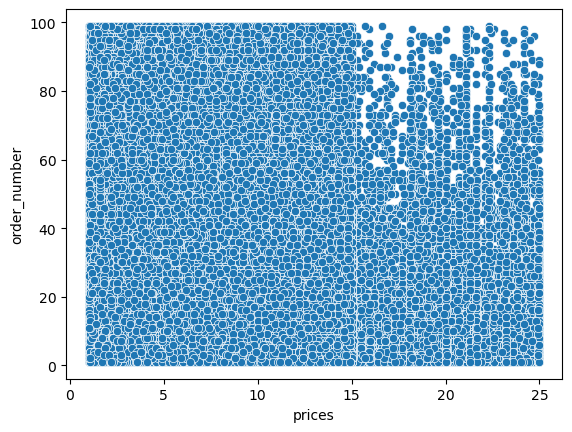

In [36]:
sns.scatterplot(x = '', y = 'order_number',data = df)

In [ ]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(df['prices'], df['Age'], alpha=0.5)
plt.title('Scatter Plot of Price vs. ' + Age.capitalize())
plt.xlabel(Age.capitalize())
plt.ylabel('Price')

# Show plot
plt.grid(True)
plt.show()

In [ ]:
df.columns

In [ ]:
#creat function
def get_combination(row):
    return f"{row['Age_Criteria']}_{row['Income_Criteria']}_{row['Baby/Pet Purchases']}_{row['Dependant_Status']}"

In [ ]:
#create new column
df['combination'] = df.apply(get_combination, axis=1)

In [ ]:
df['combination']

In [ ]:
#creat function
def income_price_range(row):
    return f"{row['Income_Criteria']}_{row['price_range_loc']}"

In [ ]:
# Drop rows with NaN values in 'Income_Criteria' and 'price_range_loc'
df8= df.dropna(subset=['Income_Criteria', 'price_range_loc'])

# Create the 'income_price' column using the function
df['income_price'] = df.apply(income_price_range, axis=1)


In [ ]:
df['income_price'].value_counts(dropna=True)

In [ ]:




# Set style for seaborn plot
sns.set(style="white")

# Set figure size
plt.figure(figsize=(10, 6))

# Create the countplot
life = sns.countplot(data=df, x='Lifestyle', hue='Age_Criteria', palette='Set1')

# Adding title to the plot
plt.title('Counts of Each Lifestyle Category with Age Criteria')

# Adding x-axis label
plt.xlabel('Lifestyle')

# Adding y-axis label
plt.ylabel('Count')

# Displaying legend
plt.legend(title='Age Criteria')

plt.show()


In [ ]:

# Calculate the counts of each lifestyle category with respect to age criteria
count_data = df.groupby(['Lifestyle', 'Age_Criteria']).size().reset_index(name='Count')

# Set style for seaborn plot
sns.set(style="white")

# Set figure size
plt.figure(figsize=(10, 6))

# Create the bar chart
bar_chart = sns.barplot(data=count_data, x='Lifestyle', y='Count', hue='Age_Criteria')

# Adding title to the plot
plt.title('Counts of Each Lifestyle Category with Age Criteria')

# Adding x-axis label
plt.xlabel('Lifestyle')


# Adding y-axis label
plt.ylabel('Count')

# Displaying legend
plt.legend(title='Age Criteria')

plt.show()


In [ ]:
#export
#Export
life.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations','life2.png'))

In [ ]:
# Group combinations by certain criteria (e.g., Age_Criteria, Income_Criteria, etc.)
grouped_df = df.groupby(['Age_Criteria', 'Income_Criteria', 'Baby/Pet Purchases', 'Dependant_Status']).size().reset_index(name='Count')

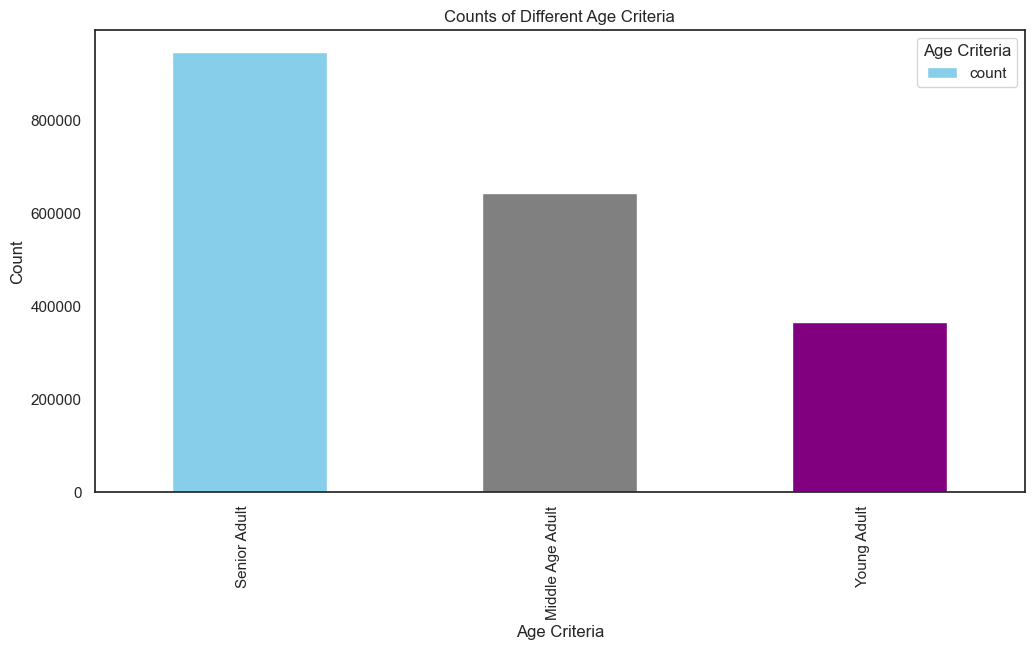

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use a Seaborn palette for the bar plot
sns.set_palette('colorblind')

# Set figure size
plt.figure(figsize=(12, 6))

# Plot the bar chart
bar_age1 = df['Age_Criteria'].value_counts().plot.bar(color=['skyblue', 'gray', 'purple'])

# Adding title to the plot
plt.title('Counts of Different Age Criteria')

# Adding x-axis label
plt.xlabel('Age Criteria')

# Adding y-axis label
plt.ylabel('Count')

# Placing x-axis labels horizontally
plt.xticks(ha = 'right')  # 'ha' parameter sets the horizontal alignment

# Display the legend
plt.legend(title='Age Criteria')

# Adjusting x-axis labels angle
#plt.xticks(rotation=90)

plt.show()


In [ ]:
#Export
bar_age1.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations','bar_age_3.png'))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom palette based on unique values in 'Age_Criteria' column
palette = sns.color_palette("colorblind", len(df['Age_Criteria'].unique()))

# Set figure size
plt.figure(figsize=(10, 6))

# Plot the countplot with legend
age_bar5= sns.countplot(data=df, x='Age_Criteria', hue='Age_Criteria', palette=palette)

# Adding title to the plot
plt.title('Counts of Different Age Criteria')

# Adding x-axis label
plt.xlabel('Age Criteria')

# Adding y-axis label
plt.ylabel('Count')

# Display the legend
plt.legend(title='Age Criteria', loc='upper right')

plt.show()


In [ ]:
#Export
age_bar5.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations','age_bar5.png'))

In [ ]:
df['Income_Criteria'].value_counts()

In [ ]:
# Define custom palette based on unique values in 'Age_Criteria' column
palette = sns.color_palette("colorblind", len(df['Age_Criteria'].unique()))

# Set figure size
plt.figure(figsize=(10, 6))

# Define custom palette based on unique values in 'Age_Criteria' column
palette = sns.color_palette("Set2", len(df['Income_Criteria'].unique()))

# Plot the countplot with legend
age_bar6= sns.countplot(data=df, x='Income_Criteria', hue='Income_Criteria', palette=palette)

# Adding title to the plot
plt.title('Counts of Different Age Criteria')

# Adding x-axis label
plt.xlabel('Age Criteria')

# Adding y-axis label
plt.ylabel('Count')

# Display the legend
plt.legend(title='Price Range', loc='upper center')


In [ ]:
#Export
age_bar6.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations','age_bar6.png'))

In [ ]:
# Define custom palette based on unique values in 'Age_Criteria' column
palette = sns.color_palette("colorblind", len(df['Age_Criteria'].unique()))

# Set figure size
plt.figure(figsize=(10, 6))

# Define custom palette based on unique values in 'Age_Criteria' column
palette = sns.color_palette("inferno", len(df['Income_Criteria'].unique()))

# Plot the countplot with legend
age_bar7= sns.countplot(data=df, x='Dependant_Status', hue='Age_Criteria', palette=palette)

# Adding title to the plot
plt.title('Counts of Different Age Criteria')

# Adding x-axis label
plt.xlabel('Age Criteria')

# Adding y-axis label
plt.ylabel('Count')

# Display the legend
plt.legend(title='Age_Criteria', loc='upper center')


In [ ]:
#Export
age_bar7.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations','age_bar7.png'))

In [ ]:


# Calculate value counts for each category in 'income_price' column
income_price_counts = df['income_price'].value_counts()

# Plotting the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='income_price', palette='pastel', order=income_price_counts.index)

# Adding title to the plot
plt.title('Frequency of Price Ranges by Income Level')

# Adding x-axis label
plt.xlabel('Price Range by Income Level')

# Adding y-axis label
plt.ylabel('Frequency')

# Adding legend
color_palette = sns.color_palette('pastel')
legend_labels = income_price_counts.index.tolist()
handles = [plt.Rectangle((0,0),1,1, color=color_palette[i], ec="k") for i in range(len(legend_labels))]
plt.legend(handles, legend_labels, title='Income Price Range', loc='upper right')

# Rotating x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjusting layout to prevent overlap
plt.tight_layout()

# Save the plot to a file (e.g., PNG)
plt.savefig('income_price_distribution.png', dpi=300)  # Change file name and format as needed

plt.show()
